In [154]:
# unsupervised learning - k Mean 
# init centorid - randomly select kth points from traning example
# find closest centroid - check nth trainning example and find which one is closest centroid
# find centroid - avegarge of centroid kth centroid 
# run k_mean iterate the processes finding centroid - converse the algo

import numpy as np
import matplotlib.pyplot as plt

In [155]:
def init_centroid(x, k):
    rand = np.random.permutation(x.shape[0])
    centroid = x[rand[:k]] 
    return centroid

In [156]:
def find_closest_centroid(x, centroids):
    c_count = centroids.shape[0]
    idx = np.zeros(x.shape[0], dtype=int) 
    for i in range(x.shape[0]):       
        distance = []
        for j in range(c_count):
            noms = np.linalg.norm(x[i] - centroids[j])
            distance.append(noms)
        idx[i] = np.argmin(distance)
    return idx   

In [157]:
def compute_centroid(x, idx, K):
    centroids = np.zeros([K, x.shape[1]])
    for k in range(K):
        points = x[idx==k]
        centroids[k] = np.mean(points, axis=0)
    return centroids
    

In [165]:
def run_kMean(x, init_centroids, itr):
    m, n = x.shape
    K = init_centroids.shape[0]
    centroids = init_centroids
    idx = np.zeros(m)   
    for i in range(itr):
        print("Find closest centroid -> " , i)
        idx = find_closest_centroid(x, centroids)
        print("calculate centroid -> " , i)
        centroids = compute_centroid(x, idx, K)
    return (centroids, idx)

In [172]:
img_train = plt.imread('Data/img3.jpeg')
img_train = img_train / 700
img_reshaped = np.reshape(img_train , (img_train.shape[0] * img_train.shape[1] ,3))
K = 20
init_centroids = init_centroid(img_reshaped, K)
centroids , idx = run_kMean(img_reshaped, init_centroids, 2) 

Find closest centroid ->  0
calculate centroid ->  0
Find closest centroid ->  1
calculate centroid ->  1


In [175]:
centroids.shape

(20, 3)

In [176]:
idx.shape

(230400,)

In [177]:
new_img = centroids[idx,:]
new_img

array([[0.35115686, 0.36298223, 0.35761315],
       [0.35115686, 0.36298223, 0.35761315],
       [0.35115686, 0.36298223, 0.35761315],
       ...,
       [0.35115686, 0.36298223, 0.35761315],
       [0.35115686, 0.36298223, 0.35761315],
       [0.35115686, 0.36298223, 0.35761315]])

In [178]:
new_img = np.reshape(new_img,img.shape)

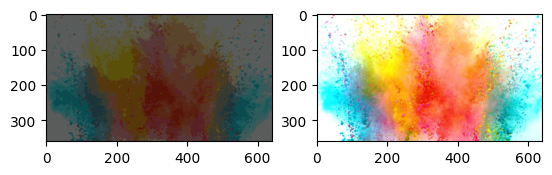

In [179]:
fig ,ax = plt.subplots(1,2)
ax[0].imshow(new_img) 
ax[1].imshow(img)